# **S05: EXERCISES**

## Exercise 1

Let's $x$ be a data vector containing a set of N houses with some information relative to them: its area (in sq. feet).

Also let's $y$ be a vector of size N with the price relative to each house in $x$.

If we represent the total area of each house versus the price, we see that there is a linear trend. The bigger the house, the more expensive it is. Given this intuition, we want to build a model to estimate the price of a new house give its area.

To achieve this goal we're going to build a linear regression model from scratch using bare matrix multiplication operations. A linear regression model it's built with the following formula:
$$y=wX^T$$

where $X$ is the data matrix, $y$ is the price vector and $w$ contains the weights of the linear regression model. Given this, we know $x$ and $y$ so we must calculate $w$ given the following formula.

$$w = (X^TX)^{-1}X^Ty$$

Follow this instructions:
 1. Load both `x` and `y` from _data/x1d.npy_ and _data/y.npy_ using the `numpy.load` function
 1. Use the function `plot_data()` to represent data in a scatter plot
 1. Calculate the weights for the linear regression
     1. Add a bias term to `x` with the provided function `add_bias`. Store the result in `X` (upper)
     1. Calculate `w` using the formula $w = (X^TX)^{-1}X^Ty$
 1. Use the function `plot_data_w_model()` to represent data and the trained linear regression model
 1. Create a new function called `guess_price` that, given an area (in sq. ft.) it returns the estimated price. What price would have a house with 13478 sq. feet.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def load_data(x_path, y_path):
    """Load x and y data from the specified paths."""
    x = np.load(x_path)
    y = np.load(y_path)
    return x, y


In [30]:
def add_bias_term(X):
    """Add a bias term to the data matrix X."""
    return np.column_stack((np.ones(X.shape[0]), X))


In [31]:
def calculate_weights(X, y):
    """Calculate the weights for the linear regression model."""
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [32]:
def plot_data_and_model(x, y, w):
    """Plot the data and the linear regression model."""
    plt.scatter(x, y, label='Data')
    x_model = np.linspace(x.min(), x.max(), 100)
    y_model = w[0] + w[1] * x_model
    plt.plot(x_model, y_model, color='red', label='Model')
    plt.title("Sale Price vs. Area")
    plt.xlabel("Area (sq. feet)")
    plt.ylabel("Sale Price ($)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [33]:
def predict_price(area, w):
    """Predict the house price given its area and the model weights."""
    return w[0] + w[1] * area

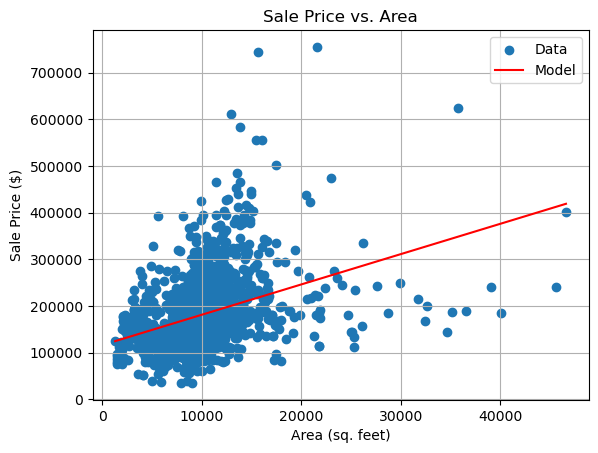

In [34]:
x_path = 'data/x1d.npy'
y_path = 'data/y.npy'

# Load the data
x, y = load_data(x_path, y_path)

# Prepare the design matrix X and compute the weights w
X = add_bias_term(x)
w = calculate_weights(X, y)

# Plot the data and the model
plot_data_and_model(x, y, w)

In [35]:
# Predict the price of a house with a specific area
area = 13478
estimated_price = predict_price(area, w)
print(f"The estimated price for a house with {area} sq. feet is ${estimated_price:.2f}")

The estimated price for a house with 13478 sq. feet is $203554.99
